## Credit Card Fraud Detection using XGBoost

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import Dataset
data= pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = data, target = 'Class')

,Description,Value
0,session_id,5815
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9558,0.8044,0.9423,0.8658,0.8656,0.8694,60.7650
et,Extra Trees Classifier,0.9996,0.9585,0.7924,0.9620,0.8669,0.8667,0.8719,12.4910
xgboost,Extreme Gradient Boosting,0.9996,0.9832,0.8161,0.9455,0.8742,0.8740,0.8773,50.2250
catboost,CatBoost Classifier,0.9996,0.9784,0.8159,0.9422,0.8723,0.8721,0.8755,67.0980
lda,Linear Discriminant Analysis,0.9994,0.9080,0.7601,0.8526,0.8004,0.8001,0.8031,1.3510
ada,Ada Boost Classifier,0.9993,0.9730,0.7180,0.8337,0.7673,0.7669,0.7712,21.1560
dt,Decision Tree Classifier,0.9992,0.8751,0.7506,0.7633,0.7554,0.7550,0.7558,6.4230
lr,Logistic Regression,0.9991,0.9474,0.6241,0.8289,0.7063,0.7059,0.7158,7.8780
gbc,Gradient Boosting Classifier,0.9990,0.6941,0.5473,0.7819,0.6238,0.6233,0.6425,119.6800
ridge,Ridge Classifier,0.9989,0.0000,0.4461,0.8086,0.5657,0.5653,0.5944,0.1820


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5815, verbose=0,
                       warm_start=False)

In [7]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9930,0.7941,0.9310,0.8571,0.8569,0.8596
1,0.9997,0.9959,0.8235,1.0000,0.9032,0.9031,0.9073
2,0.9992,0.9746,0.6176,0.8750,0.7241,0.7237,0.7348
3,0.9997,0.9769,0.8529,0.9667,0.9062,0.9061,0.9079
4,0.9996,0.9479,0.8485,0.9333,0.8889,0.8887,0.8897
5,0.9996,0.9928,0.7576,1.0000,0.8621,0.8619,0.8702
6,0.9996,0.9820,0.8788,0.9062,0.8923,0.8921,0.8922
7,0.9996,0.9954,0.8824,0.9091,0.8955,0.8953,0.8954
8,0.9996,0.9742,0.8235,0.9655,0.8889,0.8887,0.8915
9,0.9997,0.9992,0.8824,0.9677,0.9231,0.9230,0.9239


In [8]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5815, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [9]:
predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9995,0.9680,0.7355,0.9661,0.8352,0.8349,0.8427


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,67584.0,-1.533225,0.392028,3.009071,-1.645079,-1.374810,0.394181,-0.551135,0.208808,0.509956,...,-0.412536,0.608250,0.643187,-0.173452,0.364459,0.094431,8.70,0,0,1.0000
1,97812.0,1.959509,0.043915,-0.896797,1.496766,0.238832,-0.120943,-0.102810,-0.131669,1.772093,...,-0.026107,-0.438801,0.303285,-0.494908,-0.005627,-0.069789,9.99,0,0,1.0000
2,60745.0,1.192535,0.164207,0.137407,0.461482,-0.068217,-0.117108,-0.178158,0.167532,-0.036247,...,0.119448,-0.379506,0.118547,0.130839,-0.018271,0.011460,1.79,0,0,1.0000
3,56714.0,-0.259998,-0.235382,0.791216,-2.437999,-1.080748,-0.848625,-0.448690,0.084484,-1.950652,...,-0.046811,-0.190034,-0.268466,-0.428371,-0.362546,-0.255777,15.00,0,0,1.0000
4,42137.0,1.454383,-1.281154,0.746324,-1.344453,-1.850679,-0.386390,-1.480408,0.122816,-1.267091,...,0.055987,0.018651,0.193606,-0.066651,0.054050,0.019198,12.00,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,152593.0,-1.968436,-1.042017,1.298504,-0.117651,2.756522,-0.505550,-0.400440,0.415881,-0.479149,...,0.146371,-0.966338,0.263081,0.498443,-0.043671,0.071222,1.98,0,0,1.0000
85439,145576.0,2.097541,0.626231,-2.643051,0.608858,0.932587,-1.399174,0.413204,-0.410600,0.440343,...,-0.142095,-0.848356,0.375950,-0.062328,0.024186,0.002467,1.00,0,0,0.9999
85440,70355.0,-0.296186,0.942381,1.494807,0.470893,0.211239,-0.314241,0.643544,0.051249,-0.455671,...,-0.131462,0.051858,0.020421,-0.448403,0.062220,0.027184,4.92,0,0,1.0000
85441,151804.0,2.202902,-1.677476,0.135242,-1.377084,-2.152831,-0.500485,-1.800675,-0.003144,-0.519133,...,0.340533,0.010062,-0.562948,-0.248717,0.062684,-0.027673,28.00,0,0,1.0000


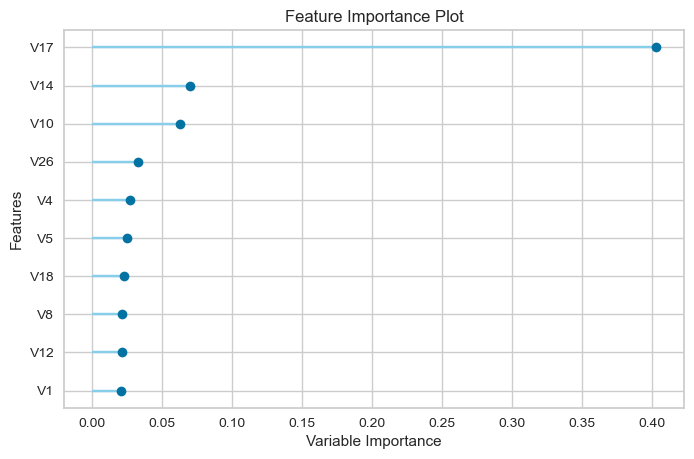

In [10]:
plot_model(xgboost, plot = 'feature') # important variables or features for model accuracy

In [11]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

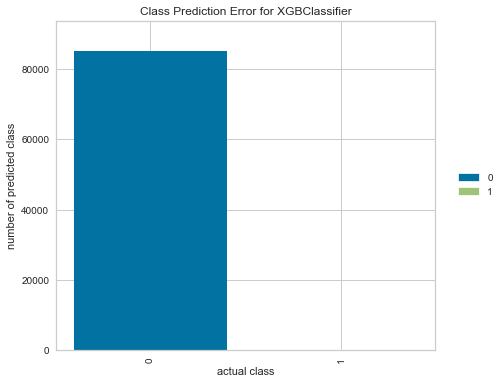

In [13]:
plot_model(xgboost, plot = 'error')